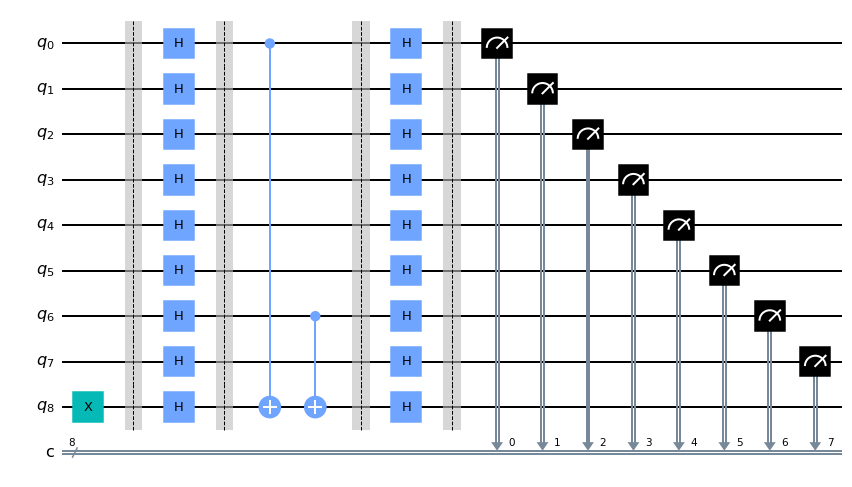

In [1]:
# Author: Khaled Alam(khaledalam.net@gmail.com)

'''
    Guess binary string (secret) of length N in 1 shot only using quantum computing circuit!

    ~ by using clasical computers we need at least N shots to guess string (secret) of length N

    ~ by using quantum computer we need 1 shot to guess string (secret) of ANY length ( cool isn't it! ^^ )

'''


secret = '01000001' # `01000001` = `A`

from qiskit import *

n = len(secret) 

qCircuit = QuantumCircuit(n+1, n) # n+1 qubits and n classical bits

qCircuit.x(n)

qCircuit.barrier()

qCircuit.h(range(n+1))

qCircuit.barrier() 

for ii, OZ in enumerate(reversed(secret)):
    if OZ == '1': 
        qCircuit.cx(ii, n)
    
qCircuit.barrier()


qCircuit.h(range(n+1))

qCircuit.barrier()

qCircuit.measure(range(n), range(n))

%matplotlib inline
qCircuit.draw(output='mpl')


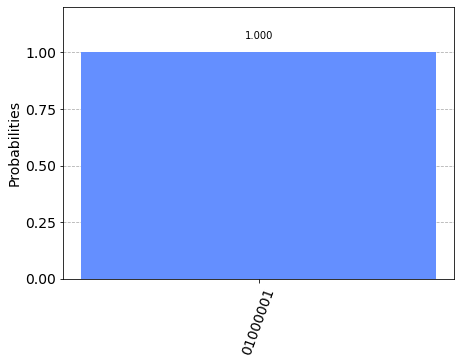

In [5]:

# run on simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qCircuit, backend=simulator, shots=1).result() # only 1 shot
from qiskit.visualization import plot_histogram
plot_histogram(
    result.get_counts(qCircuit)
)